In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as ss
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('data.csv')

## Descrevendo a base de dados

Escolhemos a base de dados do EA Sports FIFA 19,por possuir uma grande quantidade de atletas, 18207 no total,  com  86  atributos.  Por  ser  uma  base  de  dados  de um  jogo,  seus  atributos  podem  parecer  possuir  um  alto vies, entretanto os dados passaram por uma comissao de especialistas que avaliaram o quao valido ́e o valor de um atributo, buscando dar ao publico a sensação de estar em  campo  . ́E  valido  ressaltar  que  nas  ligas  presentes no  dataset,  nem  sempre  todos  os  times  est ̃ao  presentes,como ́e  o  caso  de  Palmeiras,  Corinthians,  Sao  Paulo,Flamengo  e  Vasco  que  ficaram  completamente  de  fora de FIFA 19, ja que fecharam um acordo de exclusividade com a Konami, e aparecem como parceiros de PES 2019

O  Dataset  foi  encontrado  no  Kaggle  e  esta  no  link,  os  dados  foram  obtidos  por  meio  de  um  scraping na  pagina  do  SOFIFA.  O  SOFIFA  armazena  os valores  de  cada  atributo  de  um  atleta  no  modo  carreira e  começou  a  ser  muito  utilizada  pela  comunidade  do EA FIFA quando dentro do jogo começou a ser preciso contratar um olheiro para obter informações sobre cada atleta.  Existem  muitos  atributos  interessantes  sobre  os atletas  como:  salario,  peso,  altura,  velocidade,  força,stamina, valor de recisao de contrato, posição principal,controle de bola, drible entre outros.

## Questionamentos

- Qual a correlação dos atributos dos jogadores com o seu salário?
- É possível prever a posição de um jogador dados seus atributos?
- Qual  time e seleção possui os melhores jogadores?

## Análise Exploratória

4211
13948


<BarContainer object of 2 artists>

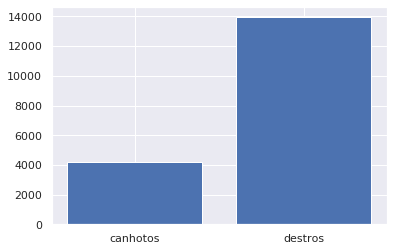

In [3]:
#explicado no video
canhotos = df['Preferred Foot'].tolist().count('Left')
print(canhotos)
destros = df['Preferred Foot'].tolist().count('Right')
print(destros)
plt.bar(['canhotos', 'destros'], [canhotos, destros])

A distribuição de destros, 13948, e canhotos, 4211, dentre os atletas do dataset é de 77% por 23% , muito perto da distribuição da população em geral que é de 80% de destros para 20% de canhotos

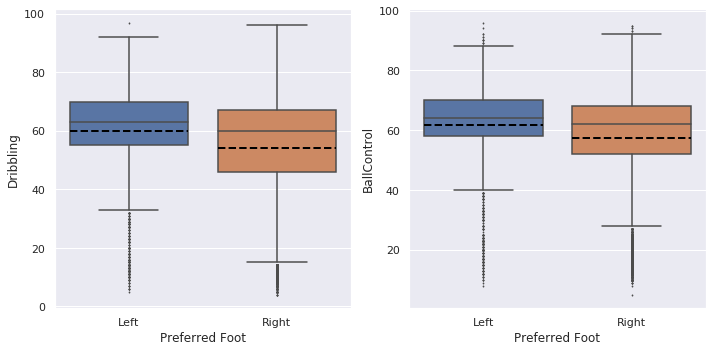

In [4]:
plt.figure(figsize=(10, 5))

meanlineprops = dict(linestyle='--', linewidth=2, color='black')
plt.subplot(1, 2, 1)
sns.boxplot(x="Preferred Foot", y="Dribbling", data=df, fliersize=1, showmeans=True, meanline=True, meanprops=meanlineprops)

plt.subplot(1, 2, 2)
sns.boxplot(x="Preferred Foot", y="BallControl", data=df, fliersize=1, showmeans=True, meanline=True, meanprops=meanlineprops)
plt.tight_layout()
plt.show()

Quem é melhor em média: canhotos ou destros? Para avaliar esse questionamento, como o controle de bola e a habilidade de drible dos jogadores são bons indicativos da "habilidade com o pé", usaremos esses para compará-los. Calculamos, então, as médias das habilidades em respeito a cada grupo, os resultados podem ser verificados no box-plot da figura X, a linha tracejada indica a média. Assim, a tendência é que um jogador canhoto aleatório, possua melhor controle de bola e drible que um jogador destro.

Para verificar essa afirmação, separamos os atletas nos respectivos grupos (Canhotos e Destros), e definimos como hipótese nula: "A média da habilidade de drible de um jogador canhoto é igual a média da habilidade de drible de um jogador destro". Como queremos verificar se há diferença entre as médias dos atletas, nossa hipótese alternativa é de que a média dos canhotos é diferente da dos destros. Definimos o nível de significância, $\alpha$ = 0.05.

Realizando um teste T entre os dois grupos, obtivemos um valor-p igual a 0.001, existindo evidência suficiente para rejeitarmos nossa hipótese nula.

O mesmo processo foi repetido, mas agora considerando a habilidade de controlar a bola (BallControl) dos atletas. Encontramos um valor-p igual a 0.005, e novamente, possuimos evidência suficiente para rejeitar a hipótese nula de que as médias de controle de bola são iguais entre os dois grupos.

In [4]:
DEF = ['GK','RB','CB','LB','SW','RWB','LWB','RCB','LCB']
MID = ['CM','LOM','ROM','OM','LCM','LM','RM','LWM','RWM','RW','LW','RCM']
MIDA = ['CAM','LAM','RAM']
MIDD = ['CDM','LDM','RDM']
ATK = ['LF','RF', 'ST', 'CF', 'RS', 'LS']

In [9]:
pos =df['Position'].unique().tolist()
pos = pos[:-1]
#print(pos)

In [6]:
avg_alt_pos = {}
for i in pos:
    avg_alt_pos[i] = (df[df['Position'] == i]['Height'].mean())

In [7]:
def_avg = []
mid_avg = []
mid_atk_avg = []
mid_def_avg = []
atk_avg = []
for key in avg_alt_pos:
    if key in DEF:
        def_avg.append(avg_alt_pos[key])
    elif key in MID:
        mid_avg.append(avg_alt_pos[key])
    elif key in MIDA:
        mid_atk_avg.append(avg_alt_pos[key])
    elif key in MIDD:
        mid_def_avg.append(avg_alt_pos[key])
    elif key in ATK:
        atk_avg.append(avg_alt_pos[key])
    else:
        continue

def_avg = pd.Series(def_avg).mean()
mid_avg = pd.Series(mid_avg).mean()
mid_atk_avg = pd.Series(mid_atk_avg).mean()
mid_def_avg = pd.Series(mid_def_avg).mean()
atk_avg = pd.Series(atk_avg).mean()

(170, 185)

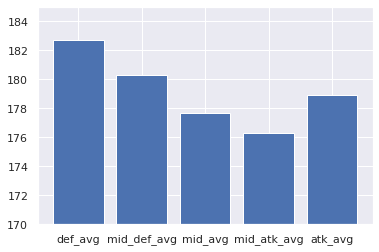

In [8]:
#altura media
plt.bar(['def_avg', 'mid_def_avg', 'mid_avg' , 'mid_atk_avg', 'atk_avg' ], [def_avg, mid_def_avg, mid_avg, mid_atk_avg, atk_avg])
plt.ylim(170,185)

Separamos os atletas em grupos de acordo com a parte do campo em que eles ficam, resultando nos grupos DEF, MIDD/MID_DEF, MID, MIDA/MID_ATK e por fim o grupo ATK.
Atletas de defesa tem a maior média dentre os grupos e os valores vão decrescendo até chegarmos em 'ATK', onde a média sobe novamente.

In [11]:
atributos_agilidade = ['Dribbling','Acceleration', 'SprintSpeed','Agility', 'Stamina']
if 'GK' in DEF:
    DEF.remove('GK')

In [12]:
dfs = [DEF, MIDD, MID, MIDA, ATK]
total = [] 
for df_ in dfs:
    dict_df = {}
    df1 = df.where(df['Position'].isin(df_)).dropna(how = 'all')
    for atributo in atributos_agilidade:
        dict_df[atributo] = df1[atributo].mean()        
    total.append(dict_df)

In [13]:
dfs = [DEF, MIDD, MID, MIDA, ATK]
total_melhor = [] 
for df_ in dfs:
    dict_df = []
    df1 = df.where(df['Position'].isin(df_)).dropna(how = 'all')
    for atributo in atributos_agilidade:
        dict_df.append(df1[atributo].mean())        
    total_melhor.append(pd.Series(dict_df).mean())

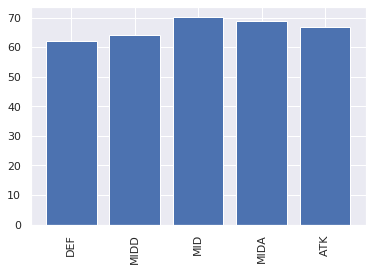

In [14]:
nomes = ['DEF', 'MIDD', 'MID', 'MIDA', 'ATK']
plt.xticks(rotation=90)
for i in range(len(nomes)):
    pos = nomes[i]
    plt.bar(pos, total_melhor[i], color = 'b')

Mobilidade dentro do dataset poderia ser expressada pela média das colunas 'Dribbling', 'Acceleration', 'SprintSpeed', 'Agility' e 'Stamina' e quando plotamos tal grafico,podemos perceber que os grupos mais baixos são também os grupos com maior mobilidade.

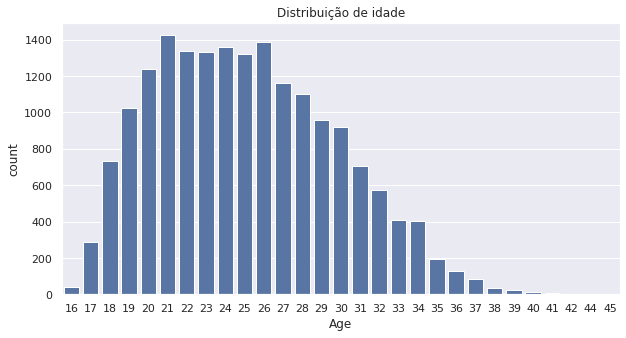

In [15]:
## Distribuiçao de idade

# A grande maioria dos jogadores está concentrada entre 19 e 30 anos.

plt.figure(figsize=(10, 5))
plt.title("Distribuição de idade")
age_distrib = sns.countplot(x="Age", data=df, color='b')

plt.show(age_distrib)

A grande maioria dos atletas presentes no dataset se concentra entre 19 e 30 anos,mais especificamente, 14562 dos 18207 atletas do dataset possuem idade nessa faixa etária.O que corresponde a aproximadamente 80\% dos atletas.Tal fato pode ser relacioando ao fato de que apesar de o dataset do FIFA cobrir um grande número de ligas ele prioriza aquelas mais importantes, acabando por deixar de lado ligas menos relevantes.Tendo isso em mente e o fato de que como o ambiente nessas ligas é extremamente competitivo e disputado, atleta muito velhos não conseguem se manter nelas, mudando-se para ligas não inclusas no dataset ou aposentando.

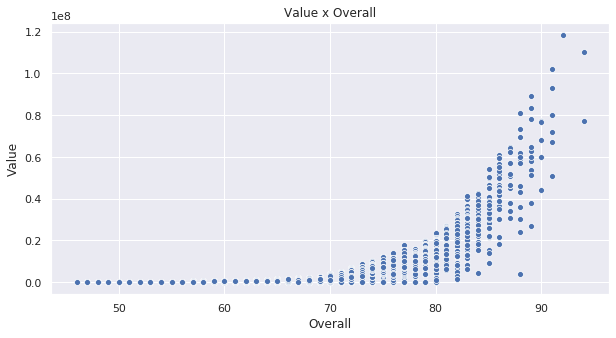

ρ = 0.908123981757991


In [16]:
import scipy.stats as ss

## Correlações

# Por apresentar alguns outliers, foi utilizada a correlação de Spearman, para as colunas "Overall" e "Value"
# Como esperado, jogadores com overall alto possuem alto valor de mercado, estando os dois atributos altamente
# correlacionados, ρ = 0.91. Entretanto, ainda é possível fazer um bom negócio e encontrar jogadores com Overall 
# alto e preço baixo.

value_overall, p_value = ss.spearmanr(df["Overall"], df["Value"])

txt = "ρ = " + str(value_overall)

plt.figure(figsize=(10,5))
plt.title("Value x Overall")
ax = sns.scatterplot(x="Overall", y="Value", data=df)

plt.show()

print(txt)

Acima temos o diagrama de dispersão entre "Overall", que é calculado com uma média ponderada dos atributos relativos a posição do atleta, e "Value", que é o valor de mercado em euros do atleta, e, por apresentar alguns outliers, foi calculada a correlação de Spearman. Como esperado, atletas com overall alto possuem alto valor de mercado, estando os dois atributos altamente correlacionados, $\rho$ = 0.91. Entretanto, ainda é possível fazer um bom negócio e encontrar atletas com Overall alto e preço baixo.

## Teste de Hipóteses

###Teste de Permutação

Usamos um teste de permutação para avaliar a diferença salarial entre goleiros e não goleiros, a diferença salarial média entre goleiros e não goleiros foi de 3293, portanto temos t_obs  = 3293. Vamos considerar que a probabilidade de ser goleiro, sera sempre a proporcao de goleiros no dataset, 0.11. O p-valor escolhido é de 5% e como hipotese nula H0:

salário médio goleiros = salário médio não goleiros 




In [0]:
df_p = df.loc[:][['Wage','Position']]
filtro_gk = df_p['Position']=='GK'

In [8]:
#Proporcao de goleiros
sum(filtro_gk)/len(filtro_gk)

0.11122095897182402

In [9]:
t_obs = df_p[~filtro_gk]['Wage'].mean()-df_p[filtro_gk]['Wage'].mean()
t_obs 

3293.6887350828756

In [0]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro_gk.values)
    diff = df_p[~filtro_gk]['Wage'].mean() - df_p[filtro_gk]['Wage'].mean()
    diferencas[i] = diff

In [14]:
100 - ss.percentileofscore(diferencas,t_obs)

0.0

Como podemos ver a diferença salarial média entre os salários não pode ser explicada pelo acaso, que nos permite rejeitar H0

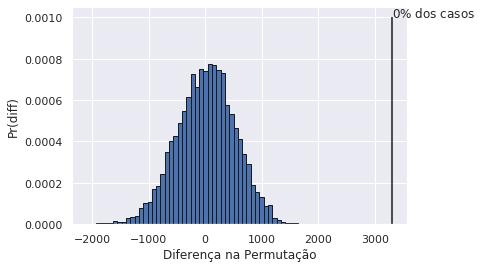

In [17]:
plt.hist(diferencas, bins=50, density=True, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(t_obs, 0, 0.0010, color='k')
plt.text(t_obs+1, 0.0010, '$0\%$ dos casos')
plt.show()

## Classificação
### Decision Tree

In [0]:
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM') | (df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM') | (df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'MF'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

df['Simple Position'] = df.apply(simple_position, axis=1)
df = df.drop(['Position'], axis=1)

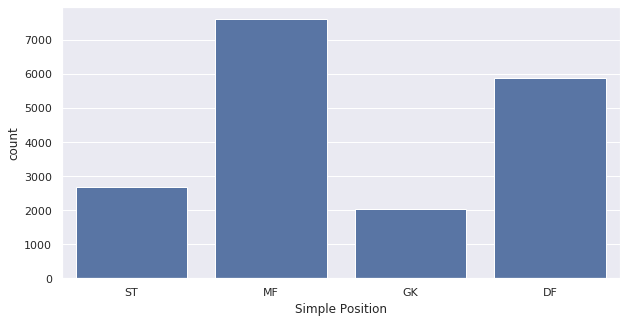

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(x="Simple Position", data=df, color='b')
plt.show()

In [0]:
drop_cols = df.columns[22:48]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Jersey Number','Joined','Special',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club', 'Weak Foot',
               'Preferred Foot', 'Nationality', 'LS', 'Release Clause', 'Work Rate', 'International Reputation',
                'Skill Moves'], axis = 1)
df = df.dropna()

feature_cols = list(df.columns)

feature_cols.pop(feature_cols.index("Simple Position"))

'Simple Position'

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(df['Simple Position'])
X = df.drop(["Simple Position"], axis=1)
X = pd.get_dummies(X)

X = X.values

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
skf = StratifiedKFold(n_splits=20, shuffle=True)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)

In [0]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [0]:
depth = []
for i in range(3,20): #tree depth
    clf = DecisionTreeClassifier(criterion="gini", max_depth=i)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.75332481089847), (4, 0.7855613437193322), (5, 0.8199359943889635), (6, 0.8391558302890536), (7, 0.8507951873251205), (8, 0.8535507915597187), (9, 0.8574774796242908), (10, 0.8567891300202162), (11, 0.8525179233528462), (12, 0.8501061499727122), (13, 0.8472819841651195), (14, 0.8436303034543569), (15, 0.8423913224677697), (16, 0.838189128226104), (17, 0.8401872279401685), (18, 0.8358466765487925), (19, 0.8323336866586519)]


In [0]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7374655647382921


In [0]:
class_names = []
for i in range(len(list(set(y_test)))):
    pos = le.inverse_transform([i])[0]
    class_names.append(pos)
class_names

['DF', 'GK', 'MF', 'ST']

/home/mateus/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


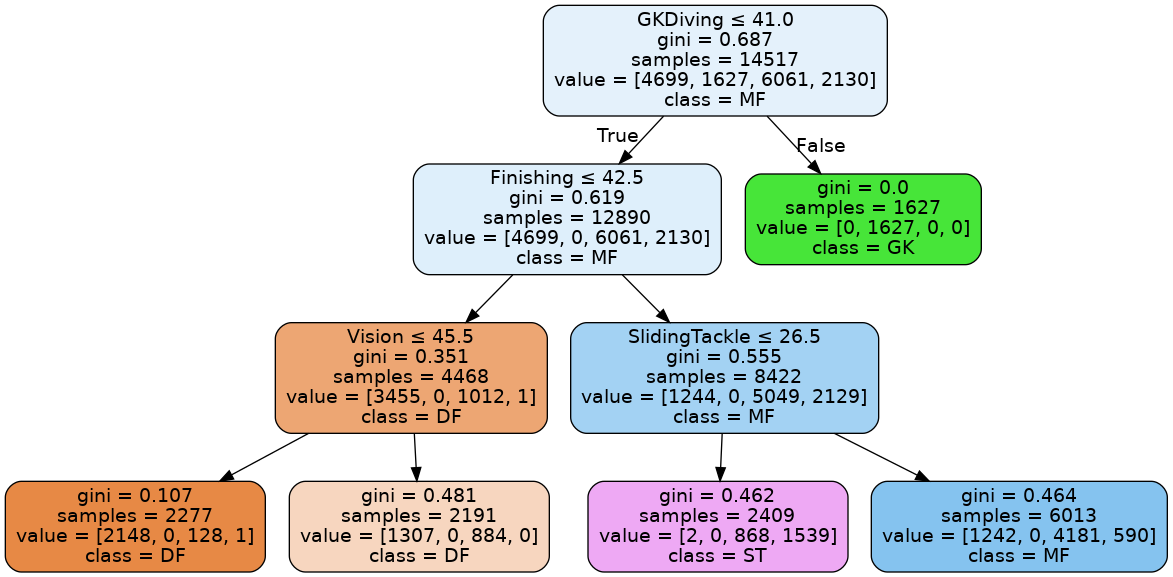

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

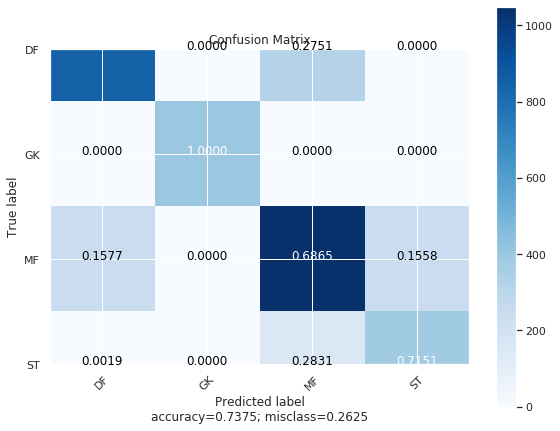

In [0]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm           = array,
                      normalize    = True,
                      target_names = class_names,
                      title        = "Confusion Matrix")

$\textbf{Parâmetros}$: foi utilizada a impureza de gini como métrica para avaliar a qualidade da árvore, a impureza de gini mede com que frequência  um elemento escolhido aleatoriamente do  conjunto seria incorretamente classificado se ele fosse rotulado aleatoriamente de acordo com a distribuição dos rótulos do subconjunto. Para facilitar a interpretação sem comprometer muito a acurácia,  limitamos a altura da árvore em 3.

$\textbf{Treino}$: Quebramos o conjunto de dados em 80\% treino e 20\% teste, além de, no treino, fazer a validação usando cross-validation com 5-folds. Já que os atletas estão razoavelmente bem distribuídos entre as classes, não foi necessário balancear o conjunto de treino.

$\textbf{Resultados}$: Obtivemos bons resultados, mesmo podando a árvore. Obteve-se uma acurácia média de 76\% no conjunto de validação, e 79\% no conjunto de teste. Como é possível observar na matriz de confusão, os goleiros são facilmente identificáveis, assim como os meias. A maior parte dos erros se concentra envolvendo atletas que são defensores ou atacantes, mas são classificados como meias. Isso se deve à grande diversidade de funções que os atletas de meio podem exercer, existindo atletas mais defensivos ou mais agressivos, ao invés de atletas "puramente" de meio, como ocorre na defesa e no ataque.

## Regressão

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

df = pd.read_csv('data.csv')

In [0]:
drop_cols = df.columns[22:48]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Jersey Number','Joined','Special',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club',
               'Preferred Foot', 'Work Rate', 'Nationality'], axis = 1)
df = df.dropna()

In [0]:
df['Simple Position'] = df.apply(simple_position, axis=1)

df = df.drop(['Position'], axis=1)

df.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Simple Position
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,ST
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,ST
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,MF
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,GK
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,MF


In [0]:
y = df["Overall"]

X = df.drop(["Overall", "Potential"], axis=1)
X = pd.get_dummies(X)

#no of features
nof_list=np.arange(1,43)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = linear_model.LinearRegression()
    
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(abs(score-high_score) > 0.2):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.776317


In [0]:
n_features = [i+1 for i in range(26)]
score_list = score_list[0:26]

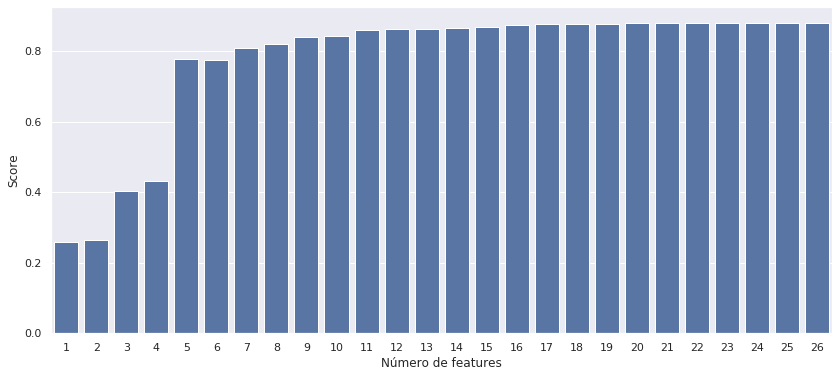

In [0]:
plt.figure(figsize=(14,6))
sns.barplot(n_features, score_list, color='b')
plt.xlabel('Número de features')
plt.ylabel('Score')
plt.show()

In [0]:
cols = list(X.columns)
model = linear_model.LinearRegression()#Initializing RFE model
rfe = RFE(model, 5)             #Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  #Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['International Reputation', 'Skill Moves', 'Reactions',
       'Simple Position_DF', 'Simple Position_GK'],
      dtype='object')


In [0]:
y = df["Overall"]

X = df.drop(["Overall"], axis=1)
X = pd.get_dummies(X)

X = X[['International Reputation', 'Skill Moves', 'Reactions',
       'Simple Position_DF', 'Simple Position_GK']]

# Transformando as variaveis categoricas em binarias usando one-hot encoding
X = pd.get_dummies(X)

indexes = X.columns

X = X.values
y = y.values

# dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# Por apresentar dados em escalas muito diferentes, iremos normalizar as colunas.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)

In [0]:
from sklearn.model_selection import cross_val_score
model = linear_model.LinearRegression()
cross_val_score(model, X_new_train, y_train, cv=20)

array([0.77255851, 0.79497874, 0.75208295, 0.77698389, 0.77545111,
       0.77852971, 0.7789866 , 0.74429688, 0.77658836, 0.77505546,
       0.74223934, 0.75017009, 0.75469095, 0.74605085, 0.75989681,
       0.77821744, 0.77299792, 0.76462117, 0.75664114, 0.79634111])

In [0]:
# ajustando o modelo com o conjunto de treino
model.fit(X_new_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
coeff_df = pd.DataFrame(model.coef_, indexes, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
Reactions,5.013906
Skill Moves,1.713953
Simple Position_GK,1.282597
International Reputation,0.933024
Simple Position_DF,0.771672


In [0]:
# usando a media e o desvio padrão do treino para converter o teste
(X_test - X_train.mean()) / X_train.std(ddof=1)
X_test_new = scaler.transform(X_test)

In [0]:
y_pred = model.predict(X_test_new)

In [0]:
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}' )
print(f'R²: {r2_score(y_test, y_pred):.2f}')

Mean squared error: 10.97
R²: 0.79


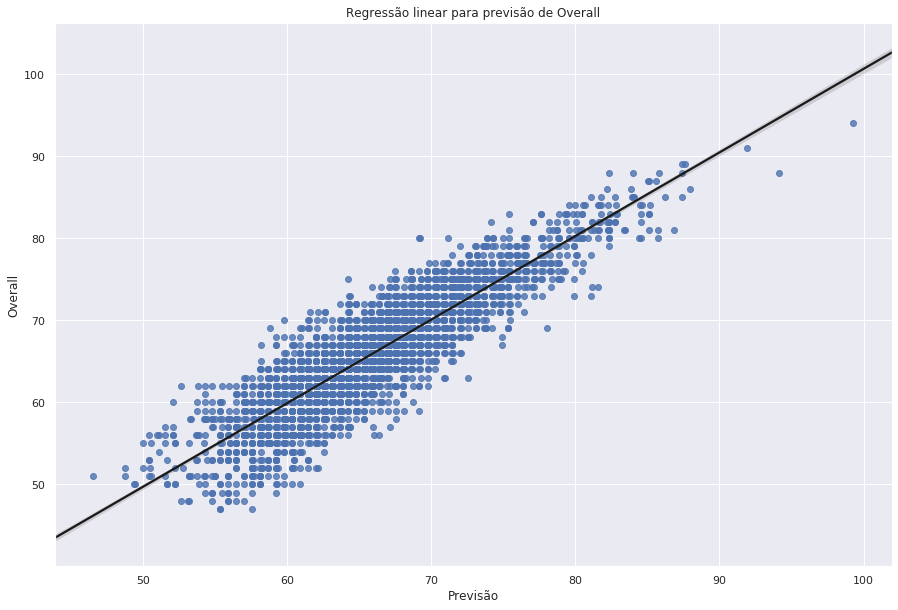

In [0]:
plt.figure(figsize=(15,10))
sns.regplot(y_pred, y_test, line_kws={'color':'k','alpha':1})
plt.xlabel("Previsão")
plt.ylabel("Overall")
plt.title("Regressão linear para previsão de Overall")
plt.show()

No nosso modelo de regressão, vamos tentar prever o Overall de um jogador usando diversos atributos. Para isso, algumas modificações foram feitas no dataset. Primeiro, por existirem mais de 20 posições no conjunto de dados, simplificamos elas em 6 grandes grupos: GK representando os goleiros, DF representando os defensores, DM os jogadores de meio defensivos, MF os meias, AM os meias ofensivos e ST representando os atacantes. Além disso, para evitar a criaçao de muitas colunas esparsas usando one-hot encoding, foi removida a coluna de nacionalidade, uma outra alternativa seria criar uma nova coluna binária em que 1 seria se a nação é grande o suficiente (escolher um número mínimo para considerar como grande) e 0, caso contrário.

$\textbf{Seleção de Features}$: Para selecionar quais colunas irão entrar no modelo de regressão linear, usamos o método de ranqueamento de features recursivo, que funciona da seguinte forma: o estimador é treinado no conjunto inicial de features e a importância das features é obtida através do seu coeficiente. Então, as features menos importantes são cortadas do conjunto de features. O procedimento é repetido até que o conjunto de features seja igual ao número desejado de features. Então para encontrar o número ótimo de features, iteramos sobre o conjunto completo de features e escolhemos aquele que obteve o melhor R².

$\textbf{Treino}$: Quebramos o conjunto de dados em 80% treino e 20% teste, além de, no treino, fazer a validação usando cross-validation com 20-folds. Depois, por apresentar atributos em diversas escalas, normalizamos as colunas do conjunto de treino. E, antes de prever o conjunto de teste, utilizamos a média e o desvio padrão do conjunto de treino para normalizar o teste.

$\textbf{Resultados}$: Erro quadrado médio: 10.96, R²: 0.7. Com a feature "Reactions" sendo a feature mais influente no Overall predito pelo modelo.

## Time com os melhores jogadores

In [33]:
df1 =df[['Club','Overall']]
df1 = df1.groupby(['Club']).sum()
df1 = df1.sort_values(by = 'Overall',ascending = False)

In [34]:
#top 5
df1.head(5)

,Overall
Club,
Real Madrid,2582
FC Barcelona,2575
Manchester United,2549
Chelsea,2534
Manchester City,2532


Considerando como melhor jogador aquele que possui maior overall, o time com os melhores jogadores é o Real Madrid, seguido de perto por FC Barcelona, Manchester Unted, Chelsea e Manchester City

## Conclusao

- Foi possível observar que Overall e o valor do jogador estão altamente correlacionados (0.91)
- Os jogadores de meio de campo são uma icognita, entretanto separar goleiros de atacantes e defensores é sim possível
- O melhor time do dataset é o Real Madrid